<a href="https://colab.research.google.com/github/Omarnot2far/Python_Data_analysis-ML/blob/main/Data_Exploration_on_Cradit_Home_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit / Home Loans - AutoML vs Bespoke ML

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 

You will be required to follow the data science lifecycle to fulfill the objective. The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

You now know the CRoss Industry Standard Process for Data Mining (CRISP-DM), have an idea of the business needs and objectivess, and understand the data. Next is the tedious task of preparing the data for modeling, modeling and evaluating the model. Luckily, just like EDA the first of the two phases can be automated. But also, just like EDA this is not always best. 

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for? 



# Import Libraries

In [307]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline


# Import Datasets

In [309]:
files = glob('/content/*.csv')
files

['/content/test.csv', '/content/train.csv', '/content/submission.csv']

In [310]:
# 1.Build `wrangle` function

def wrangle (filepath):
    df = pd.read_csv(filepath)

    return df

In [311]:
frames = [wrangle(file) for file in files]
df = pd.concat(frames, ignore_index = True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            1348 non-null   object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    float64
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 137.0+ KB
None


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340.0,2546.0,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban,NaN


In [312]:
df.duplicated().sum()

0

In [313]:
# parcentage of nan value
df.isnull().sum() / len(df)

Loan_ID              0.000000
Gender               0.290059
Married              0.274481
Dependents           0.290801
Education            0.272255
Self_Employed        0.313056
ApplicantIncome      0.272255
CoapplicantIncome    0.272255
LoanAmount           0.292285
Loan_Amount_Term     0.287092
Credit_History       0.330861
Property_Area        0.272255
Loan_Status          0.544510
dtype: float64

# EDA

How do the the loan statuses compare? i.e. what is the distrubition of each?

In [314]:
df['Loan_Status'].value_counts()



Y    422
N    192
Name: Loan_Status, dtype: int64

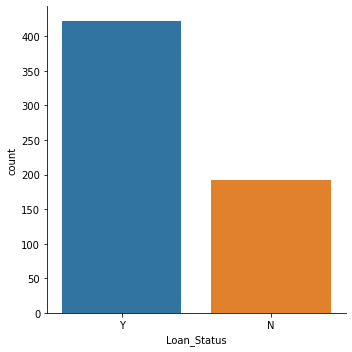

In [315]:
sns.catplot(x='Loan_Status',
          data=df,
          kind='count')

How do women and men compare when it comes to defaulting on loans in the historical dataset?

In [316]:
df['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

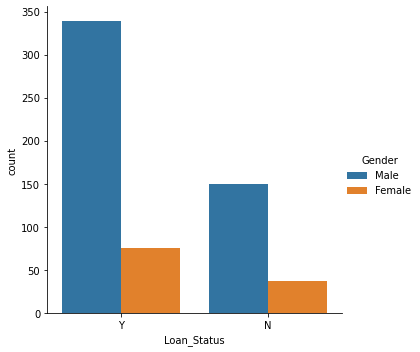

In [317]:
# plotting graph
sns.catplot(data=df, x="Loan_Status", hue="Gender", kind="count")

In [318]:
#Parcentage of male and female loan ration
df.groupby('Gender')['Loan_Status'].value_counts(normalize=True)*100

Gender  Loan_Status
Female  Y              66.964286
        N              33.035714
Male    Y              69.325153
        N              30.674847
Name: Loan_Status, dtype: float64

How many of the loan applicants have dependents based on the historical dataset?

In [319]:
# applicants with no dependent
df['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [320]:
df.groupby('Dependents')['Loan_Status'].value_counts()

Dependents  Loan_Status
0           Y              238
            N              107
1           Y               66
            N               36
2           Y               76
            N               25
3+          Y               33
            N               18
Name: Loan_Status, dtype: int64

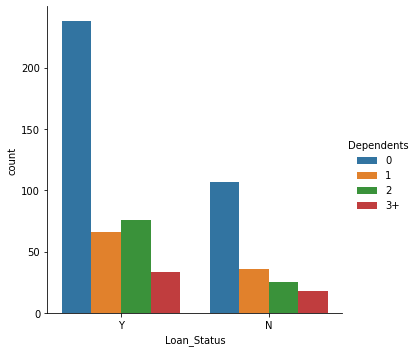

In [321]:
# plotting graph
sns.catplot(data=df, x="Loan_Status", hue="Dependents", kind="count")

How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?



In [322]:
df.groupby('Self_Employed')['ApplicantIncome'].describe()

,count,mean,std,min,25%,50%,75%,max
Self_Employed,,,,,,,,
No,807.0,4892.030979,5406.791993,0.0,2861.5,3708.0,5000.0,81000.0
Yes,119.0,6912.579832,5727.299872,570.0,3333.0,5503.0,8312.0,39147.0


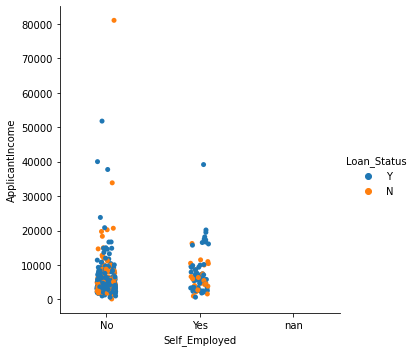

In [323]:
sns.catplot(x='Self_Employed',
           y='ApplicantIncome',
           data= df,
            hue = 'Loan_Status')

In [324]:
df.groupby('Self_Employed')['Loan_Status'].value_counts() 

Self_Employed  Loan_Status
No             Y              343
               N              157
Yes            Y               56
               N               26
Name: Loan_Status, dtype: int64

Are applicants with a credit history more likely to default than those who do not have one?


In [325]:
df['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [326]:
df.groupby('Credit_History')['Loan_Status'].value_counts() 

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              378
                N               97
Name: Loan_Status, dtype: int64

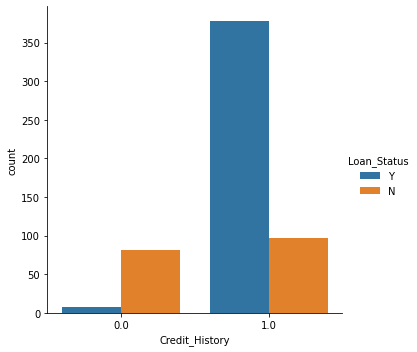

In [327]:
sns.catplot(data=df, x="Credit_History", hue="Loan_Status", kind="count")


Is there a correlation between the applicant's income and the loan amount they applied for?

In [328]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.114247,0.551811,-0.023089,0.023378
CoapplicantIncome,-0.114247,1.000000,0.179228,-0.043860,-0.027253
LoanAmount,0.551811,0.179228,1.000000,0.055636,-0.008235
Loan_Amount_Term,-0.023089,-0.043860,0.055636,1.000000,-0.020439
Credit_History,0.023378,-0.027253,-0.008235,-0.020439,1.000000


<Axes: >

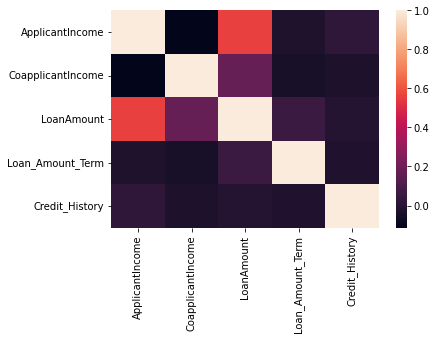

In [329]:
sns.heatmap(df.corr())

There's a positive correlation between the applicant's income and the loan amount.